In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
#importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
#importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,Input

In [ ]:
#To ensure the GPU is present
pysical_devices = tf.config.experimental.list_physical_devices("GPU")
if len(pysical_devices) > 0:
    #To ensure the GPU is present
    pysical_devices = tf.config.experimental.list_physical_devices("GPU")
    if len(pysical_devices) > 0:
        tf.config.experimental.set_memory_growth(pysical_devices[0],True)
        print("GPU is Used")
    else:
        print("GPU is Unavailable!")

GPU is Used


In [ ]:
#Load and explore the dataset
train_dir ='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [ ]:
#List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

#Display the class names
print(f'Number of classes: {num_classes}')
print(f'Class names: {classes}')




FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'

In [ ]:
!pip install kagglehub

import kagglehub
import os

# Download latest version and specify extraction path
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

# Define data directories using the downloaded path
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'test')

# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of classes: {num_classes}')
print(f'Class names: {classes}')


Number of classes: 2
Class names: ['nofire', 'fire']


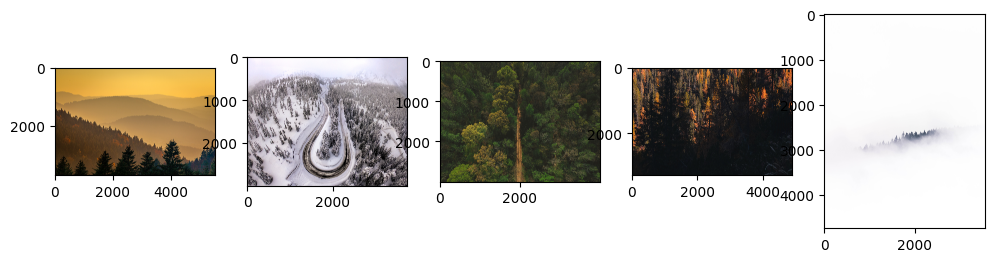

In [ ]:
#let's vis(ualize the image in the dataset
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module and assign it to plt

plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)

  plt.subplot(1,5,i+1)
  plt.imshow(img)

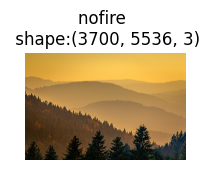

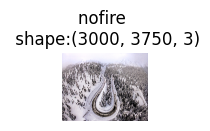

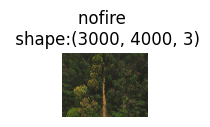

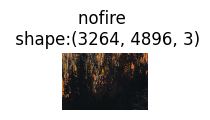

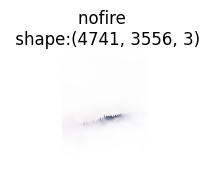

In [ ]:
#let's vis(ualize the image in the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)

  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape:{img.shape}')
  plt.axis('off')
  plt.show()

In [ ]:
#Preprocessing
#Image dimensions and batch size
img_width,img_height=150,150
batch_size=32 #there willbe  32 images in batch!

#Import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data generators
train_datagen=ImageDataGenerator(rescale=1./225)
val_datagen=ImageDataGenerator(rescale=1./225)
test_datagen=ImageDataGenerator(rescale=1./225)

#Preprocessing
#Image dimensions and batch size
img_width,img_height=150,150
batch_size=32 #there willbe  32 images in batch!

#Data generators
train_datagen=ImageDataGenerator(rescale=1./225)
val_datagen=ImageDataGenerator(rescale=1./225)
test_datagen=ImageDataGenerator(rescale=1./225)

# Define train_dir, val_dir, and test_dir before using them
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

# Update train_dir to the actual location of the downloaded data
# Assuming the dataset is extracted to 'the_wildfire_dataset_2n_version' within the downloaded path
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'test')

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
#Map the indicates
class_mapping = train_generator.class_indices # Corrected the variable name to 'train_generator'
#print(class_map)
#Extract the class names
class_names = list(class_mapping.keys())
print("class Name:",class_names)

class Name: ['fire', 'nofire']


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input

# Define img_width and img_height
img_width, img_height = 150, 150 #These values can be adjusted.

# let's build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (34, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

NameError: name 'MaxPooling2D' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input # Ensure MaxPooling2D is imported

# Define img_width and img_height
img_width, img_height = 150, 150 #These values can be adjusted.

# let's build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (34, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)), # Now MaxPooling2D should be recognized

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 117, 148, 32)   │         9,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 58, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    14,483,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,586,657 (55.64 MB)

 Trainable params: 14,586,657 (55.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model before calling model.fit()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples //batch_size,
    epochs = 12,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)

Epoch 1/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 449s 8s/step - accuracy: 0.7277 - loss: 0.5331 - val_accuracy: 0.7005 - val_loss: 0.5703
Epoch 2/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8750 - loss: 0.4573 - val_accuracy: 0.6901 - val_loss: 0.5778
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 502s 8s/step - accuracy: 0.7370 - loss: 0.4826 - val_accuracy: 0.7474 - val_loss: 0.4893
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7812 - loss: 0.5288 - val_accuracy: 0.7188 - val_loss: 0.5118
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 504s 8s/step - accuracy: 0.7303 - loss: 0.4986 - val_accuracy: 0.7214 - val_loss: 0.6364
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6562 - loss: 0.5512 - val_accuracy: 0.7135 - val_loss: 0.6534
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 510s 9s/step - accuracy: 0.7410 - loss: 0.4885 - val_accuracy: 0.7135 - val_loss: 0.6054
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7188 - loss: 0.5429 - val_accuracy: 0.7005 - val_

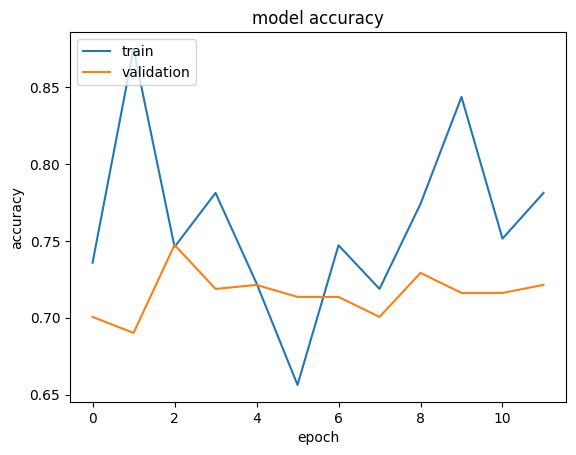

In [ ]:
# Evaluate the mode - plotting training and validation acc
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

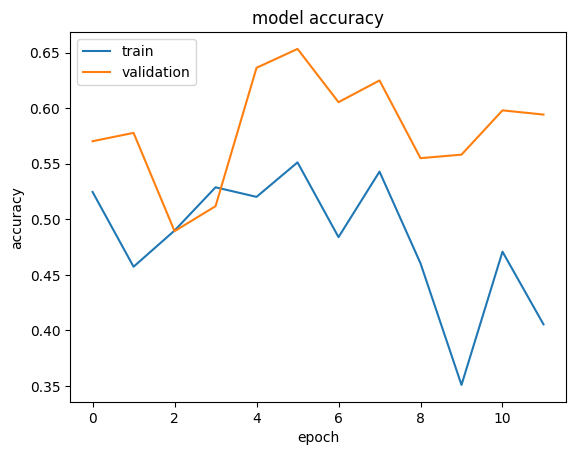

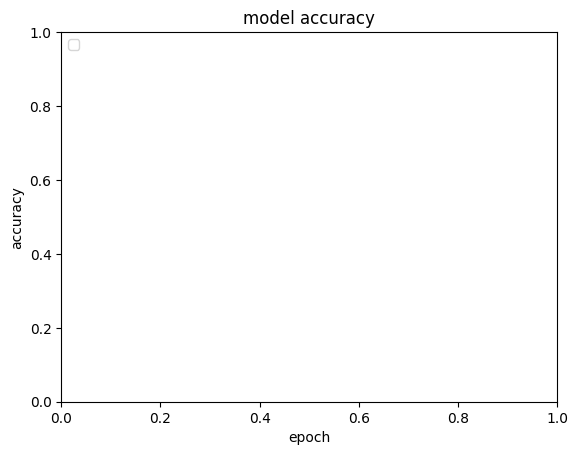

In [ ]:
# Evaluate the mode - plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model using test data
test_loss, test_acc =model.evaluate(test_generator,steps=test_generator.samples // batch_size )
print(f'Test accuracy: {test_acc :.4f}') # Removed the comma from the format specifier

12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.7753 - loss: 0.4501
Test accuracy: 0.7682


In [ ]:
# Save the model
model.save('FFD.keras')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = load_model('FFD.keras')

# Predict on new image -create  a function
def predict_fire(img_path,class_names):
  img = image.load_img(img_path, target_size=(150,150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [ ]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

In [ ]:
def predict_fire(img_path, class_names):
    # ... function implementation
    if prediction[0] > 0.5:
        predicted_class = class_names[1]  # Accessing elements within class_names
    else:
        predicted_class = class_names[0]  # Accessing elements within class_names

In [ ]:

predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/23289748533_1a14a0f249_o.jpg')